In [27]:
import numpy as np
import datetime
import platform
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from mlagents_envs.environment import UnityEnvironment, ActionTuple
from mlagents_envs.side_channel.engine_configuration_channel\
                             import EngineConfigurationChannel

                        

In [28]:
# # 유니티 환경 경로 설정
game = "Single_Agent_RL"
env_name = "./Single_Agent_RL_Global_small/Single_Agent_RL_Global_small_3"

# 유니티 환경 경로 설정 (file_name)
engine_configuration_channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=env_name,
                        side_channels=[engine_configuration_channel])
env.reset()


In [72]:

# 유니티 브레인 설정 
behavior_name = list(env.behavior_specs.keys())[0]
spec = env.behavior_specs[behavior_name]
engine_configuration_channel.set_configuration_parameters(time_scale=12.0)
dec, term = env.get_steps(behavior_name)


print(dec.obs[0].shape)
print(dec.obs[0][:,:,:,:3].shape)
print(dec.obs[1].shape)

print(dec.obs[2].shape)
print(dec.obs[2][:,0:6])
print(dec.obs[2][:,6:12])


(1, 84, 84, 9)
(1, 84, 84, 3)
(1, 84, 84, 3)
(1, 18)
[[-20.    2.   19.   16.  -13.5   2.5]]
[[-20.  -12.   18.   -7.  -17.5  -9.5]]


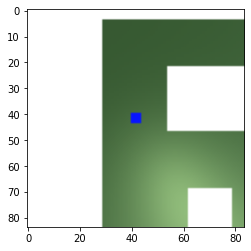

In [62]:
import matplotlib.pyplot as plt
env.reset()
env.step()
plt.imshow(dec.obs[0][0][:,:,:3])



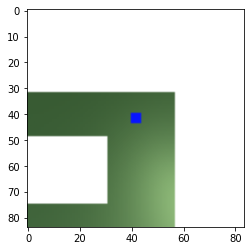

In [63]:
plt.imshow(dec.obs[0][0][:,:,3:6])

In [64]:
env.close()